### I will be using this notebook for my capstone project

In [64]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Introduction, Accident Severity based on weather, intoxication, and distracted driving

The problem is we want to predict the accident severity of future accidents, based on the weather and location

I will also explore the correlation between intoxiation and distracted driving with accident severity, to display the dangers of drunk and distracted driving 

## Data

I will be using the shared dataset of the Seattle Accident data. After initial exploration of the data I will be including severity code, location, number of people in the accident, number of cars in the accident, weather/light/road conditions, intoxication, and distracted driver attributes for the usuable data. Since intoxicated and distracted driving should be done under no situation, and first responders will not have access to this data at the time of the accident, I will not train my model with these attributes, but will only display the correlation between the them and accident severity.

In [65]:
data = pd.read_csv('Data-Collisions.csv')

/Users/brendanjenkins/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
#display column names
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [67]:
data.shape

(194673, 38)

In [68]:
df = data[['INCKEY','X', 'Y','SEVERITYCODE', 'LOCATION',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
       'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 
       'SPEEDING', 'INATTENTIONIND', 'UNDERINFL']]

In [69]:
#df.set_index(['REPORTNO'],inplace =True) #make report number the index because it is a unique identifier/primary key

In [70]:
df.set_index('INCKEY', inplace = True)

In [71]:
df.head()

,X,Y,SEVERITYCODE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
INCKEY,,,,,,,,,,,,,,,
1307,-122.323148,47.703140,2,5TH AVE NE AND NE 103RD ST,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN,NaN,N
52200,-122.347294,47.647172,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN,NaN,0
26700,-122.334540,47.607871,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN,NaN,0
1144,-122.334803,47.604803,1,2ND AVE BETWEEN MARION ST AND MADISON ST,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN,NaN,N
17700,-122.306426,47.545739,2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN,NaN,0


In [72]:
df.isnull().sum()

X                   5334
Y                   5334
SEVERITYCODE           0
LOCATION            2677
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
INATTENTIONIND    164868
UNDERINFL           4884
dtype: int64

In [73]:
df['SPEEDING'].unique()

array([nan, 'Y'], dtype=object)

In [74]:
df['SPEEDING'].replace(np.nan, 'N', inplace=True)

/Users/brendanjenkins/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [75]:
#df['INATTENTIONIND'].unique()
df['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)

In [76]:
df['UNDERINFL'].unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

In [77]:
df['UNDERINFL'].replace('N', '0', inplace=True)
df['UNDERINFL'].replace('Y', '1', inplace=True)

In [78]:
df['UNDERINFL'].unique()

array(['0', nan, '1'], dtype=object)

In [79]:
df = df.dropna()

In [80]:
df.isnull().sum()

X                 0
Y                 0
SEVERITYCODE      0
LOCATION          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
INATTENTIONIND    0
UNDERINFL         0
dtype: int64

In [81]:
df['UNDERINFL'].value_counts()

0    171268
1      8818
Name: UNDERINFL, dtype: int64

In [82]:
df['INATTENTIONIND'].value_counts()

N    151294
Y     28792
Name: INATTENTIONIND, dtype: int64

In [83]:
df.head()

,X,Y,SEVERITYCODE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
INCKEY,,,,,,,,,,,,,,,
1307,-122.323148,47.703140,2,5TH AVE NE AND NE 103RD ST,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,N,0
52200,-122.347294,47.647172,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,N,0
26700,-122.334540,47.607871,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N,N,0
1144,-122.334803,47.604803,1,2ND AVE BETWEEN MARION ST AND MADISON ST,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,N,0
17700,-122.306426,47.545739,2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,N,N,0


In [84]:
df.SEVERITYCODE.value_counts()

1    124264
2     55822
Name: SEVERITYCODE, dtype: int64

In [85]:
from sklearn.utils import resample

In [86]:
df_1 = df[df.SEVERITYCODE == 1]
df_2 = df[df.SEVERITYCODE == 2]

df_majority = resample(df_1, replace = False, n_samples = 55822)
df_bal = pd.concat([df_majority, df_2])

df_bal.SEVERITYCODE.value_counts()

2    55822
1    55822
Name: SEVERITYCODE, dtype: int64

In [87]:
df

,X,Y,SEVERITYCODE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
INCKEY,,,,,,,,,,,,,,,
1307,-122.323148,47.703140,2,5TH AVE NE AND NE 103RD ST,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,N,0
52200,-122.347294,47.647172,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,N,0
26700,-122.334540,47.607871,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N,N,0
1144,-122.334803,47.604803,1,2ND AVE BETWEEN MARION ST AND MADISON ST,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,N,0
17700,-122.306426,47.545739,2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309534,-122.290826,47.565408,2,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,3,0,0,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,N,0
309085,-122.344526,47.690924,1,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Daylight,N,Y,0
311280,-122.306689,47.683047,2,20TH AVE NE AND NE 75TH ST,3,0,0,2,At Intersection (intersection related),Clear,Dry,Daylight,N,N,0


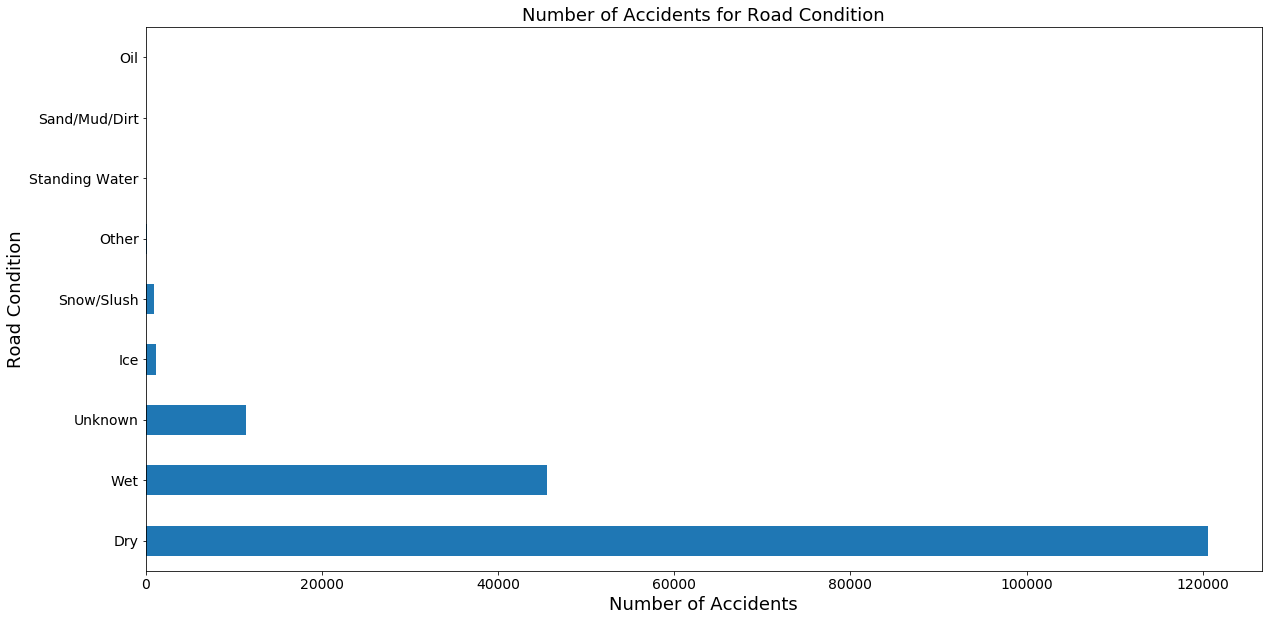

In [88]:
import matplotlib.pyplot as plt

df.ROADCOND.value_counts().plot(kind='barh', figsize=(20, 10), fontsize = 14)
plt.title('Number of Accidents for Road Condition', fontsize = 18)
plt.ylabel('Road Condition', fontsize = 18)
plt.xlabel('Number of Accidents', fontsize = 18)
plt.show()

We see the most top 2 road conditions for accidents is dry and wet, but this is the total amount of accidents. Lets check with only the most severe accidents.

In [89]:
df['SEVERITYCODE'].unique() #only accident severity of 1 and 2, so I will only now look at those with 2

array([2, 1])

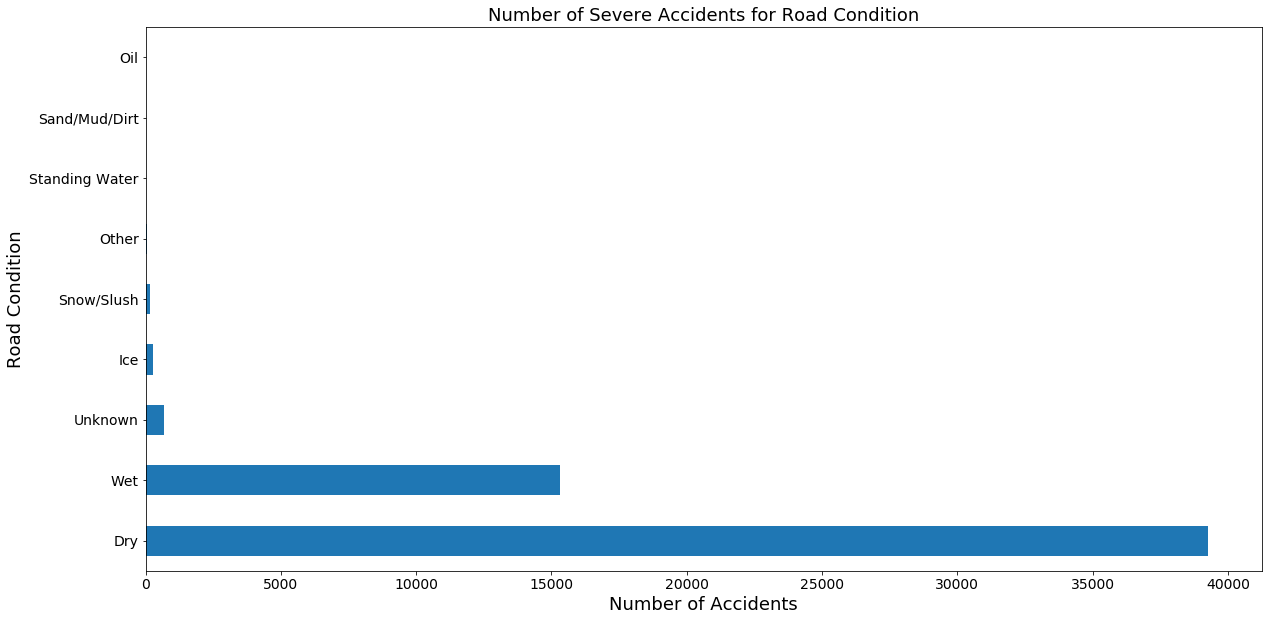

In [90]:
df.loc[df['SEVERITYCODE'] == 2].ROADCOND.value_counts().plot(kind='barh', figsize=(20, 10), fontsize = 14)

plt.title('Number of Severe Accidents for Road Condition', fontsize = 18)
plt.ylabel('Road Condition', fontsize = 18)
plt.xlabel('Number of Accidents', fontsize = 18)

plt.show()

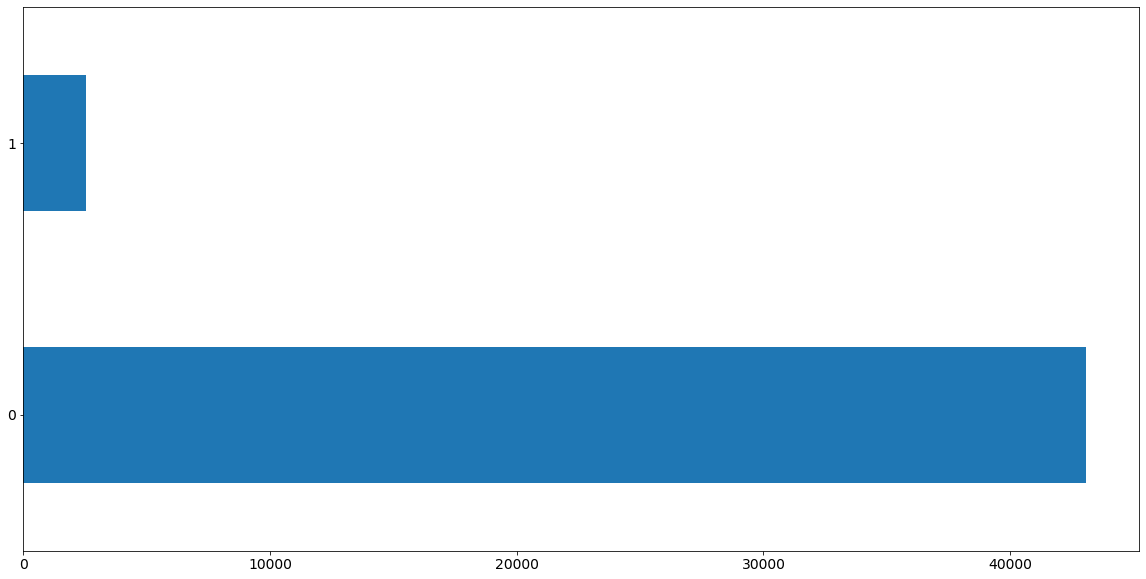

In [91]:
#get a data frame where road conditions are wet
df_wet = df.loc[df['ROADCOND'] == 'Wet']

df_wet.UNDERINFL.value_counts().plot(kind='barh', figsize=(20, 10), fontsize = 14)

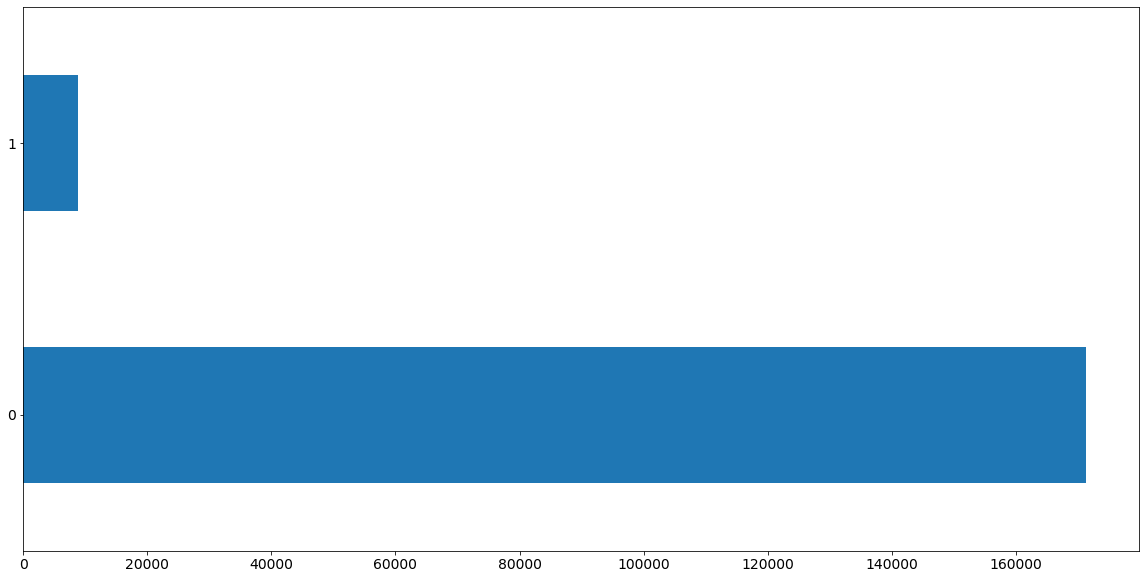

In [92]:
df.UNDERINFL.value_counts().plot(kind='barh', figsize=(20, 10), fontsize = 14)

In [93]:
import folium
world_map = folium.Map()
world_map = folium.Map(location=[47.6, -122.3], zoom_start=11)
world_map

In [94]:
df_accident = df.iloc[0:200, :]

In [95]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_accident.Y, df_accident.X):
    incidents.add_child(folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
world_map.add_child(incidents)

In [96]:
wet_map = folium.Map()
wet_map = folium.Map(location=[47.6, -122.3], zoom_start=11)
df_wet_accident = df_wet.iloc[0:200, :]

wet_incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_wet_accident.Y, df_wet_accident.X):
    wet_incidents.add_child(folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

# add incidents to map
wet_map.add_child(wet_incidents)

In [97]:
df_2 = df.loc[df['SEVERITYCODE'] == 2]

bad_map = folium.Map()
bad_map = folium.Map(location=[47.6, -122.3], zoom_start=11)
df_2_accident = df_2.iloc[0:200, :]

accident_2 = folium.map.FeatureGroup()

for lat, lng, in zip(df_2_accident.Y, df_2_accident.X):
    accident_2.add_child(folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

# add incidents to map
bad_map.add_child(accident_2)

In [98]:
df_drunk = df.loc[df['UNDERINFL'] == '1']

drunk_map = folium.Map()
drunk_map = folium.Map(location=[47.6, -122.3], zoom_start=11)
df_drunk = df_2.iloc[0:200, :]

drunk_accident = folium.map.FeatureGroup()

for lat, lng, in zip(df_drunk.Y, df_drunk.X):
    drunk_accident.add_child(folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

# add incidents to map
drunk_map.add_child(drunk_accident)

In [99]:
df.dtypes

X                 float64
Y                 float64
SEVERITYCODE        int64
LOCATION           object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE       object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
INATTENTIONIND     object
UNDERINFL          object
dtype: object

In [100]:
from sklearn import preprocessing
column_list = ['LOCATION','JUNCTIONTYPE', 'WEATHER','ROADCOND', 'LIGHTCOND', 'SPEEDING','INATTENTIONIND', 'UNDERINFL']

for i in column_list:
    le = preprocessing.LabelEncoder()
    le.fit(df_bal[i])
    df_bal[i] = le.transform(df_bal[i])
    

In [101]:
df_bal

,X,Y,SEVERITYCODE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
INCKEY,,,,,,,,,,,,,,,
139454,-122.277743,47.640702,1,10385,2,0,0,2,4,1,0,8,0,0,0
203924,-122.317583,47.619932,1,10278,0,0,0,2,4,4,0,5,0,0,0
150356,-122.340425,47.655670,1,13287,2,0,0,2,4,1,0,4,0,1,0
27699,-122.388524,47.559341,1,17959,2,0,0,2,2,10,7,8,0,0,0
62213,-122.344539,47.692012,1,8469,4,0,0,4,0,4,0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309335,-122.299160,47.579673,2,15663,3,0,0,2,4,6,8,5,0,1,0
309170,-122.344569,47.694547,2,8572,2,0,0,2,4,1,8,5,0,0,0
309534,-122.290826,47.565408,2,4608,3,0,0,2,4,1,0,5,0,0,0


In [109]:
from sklearn.model_selection import train_test_split
X = df_bal[['X', 'Y','LOCATION', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT','VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER' ,'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'INATTENTIONIND','UNDERINFL']]
y = df_bal['SEVERITYCODE']

In [110]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [111]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)

In [112]:
print ('Train set:', X_train.shape, y_train.shape) 
print ('Test set:', X_test.shape, y_test.shape)

Train set: (89315, 14) (89315,)
Test set: (22329, 14) (22329,)


In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
yhat = knn.predict(X_test)

In [115]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7299893634887756
Test set Accuracy:  0.5888306686371982


In [117]:
for k in range(1,30):
    print(k)
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

1
Train set Accuracy:  0.9517774170072216
Test set Accuracy:  0.5895472255810829
2
Train set Accuracy:  0.7710015115042266
Test set Accuracy:  0.5703345425231762
3
Train set Accuracy:  0.7867995297542406
Test set Accuracy:  0.6019974024810785
4
Train set Accuracy:  0.7299893634887756
Test set Accuracy:  0.5888306686371982
5
Train set Accuracy:  0.7383194312265577
Test set Accuracy:  0.6023556809530207
6
Train set Accuracy:  0.7072272294687343
Test set Accuracy:  0.5909355546598594
7
Train set Accuracy:  0.7142921121872026
Test set Accuracy:  0.6036544404138117
8
Train set Accuracy:  0.6950568213625931
Test set Accuracy:  0.5924582381656143
9
Train set Accuracy:  0.6979230812293568
Test set Accuracy:  0.6048636302566169
10
Train set Accuracy:  0.6840956166377428
Test set Accuracy:  0.599310313941511
11
Train set Accuracy:  0.6853943906398702
Test set Accuracy:  0.6047740606386314
12
Train set Accuracy:  0.6751609472093153
Test set Accuracy:  0.5985937569976264
13
Train set Accuracy:  0.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, dt_pred))

DecisionTrees's Accuracy:  0.6677415020824936


In [122]:
jaccard_score(y_test,dt_pred)

0.532896807907826